# Display all the regions defined in the `antarctic_plots.regions` module

In [52]:
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, regions, fetch, utils
from statistics import mean

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Add all region strings to dictionary

In [55]:
exclude = lambda k: k.startswith('__')
region_dict = {k: v for k, v in vars(regions).items() if not exclude(k)}

remove = ['antarctica', 'west_antarctica', 'east_antarctica']
[region_dict.pop(key) for key in remove]

region_dict
# region_list = [item for item in dir(regions) if not item.startswith("__")]
# region_list

{'ross_embayment': [-760000.0, 600000.0, -2200000.0, -350000.0],
 'antarctic_peninsula': [-2600000.0, -1200000.0, 170000.0, 1800000.0],
 'marie_byrd_land': [-1400000.0, -400000.0, -1460000.0, -200000.0],
 'victoria_land': [160000.0, 1350000.0, -2240000.0, -990000.0],
 'roosevelt_island': [-480000.0, -240000.0, -1220000.0, -980000.0],
 'ross_island': [210000.0, 360000.0, -1400000.0, -1250000.0],
 'minna_bluff': [210000.0, 390000.0, -1310000.0, -1120000.0],
 'mcmurdo_dry_valleys': [320000.0, 480000.0, -1400000.0, -1220000.0],
 'siple_coast': [-700000.0, 30000.0, -1110000.0, -450000.0],
 'crary_ice_rise': [-330000.0, -40000.0, -830000.0, -480000.0],
 'siple_dome': [-630000.0, -270000.0, -970000.0, -630000.0],
 'ross_ice_shelf': [-680000.0, 470000.0, -1420000.0, -310000.0],
 'larsen_ice_shelf': [-2430000.0, -1920000.0, 900000.0, 1400000.0],
 'ronne_filchner_ice_shelf': [-1660000.0, -370000.0, 80000.0, 1330000.0],
 'amery_ice_shelf': [1530000.0, 2460000.0, 430000.0, 1000000.0],
 'pine_islan

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


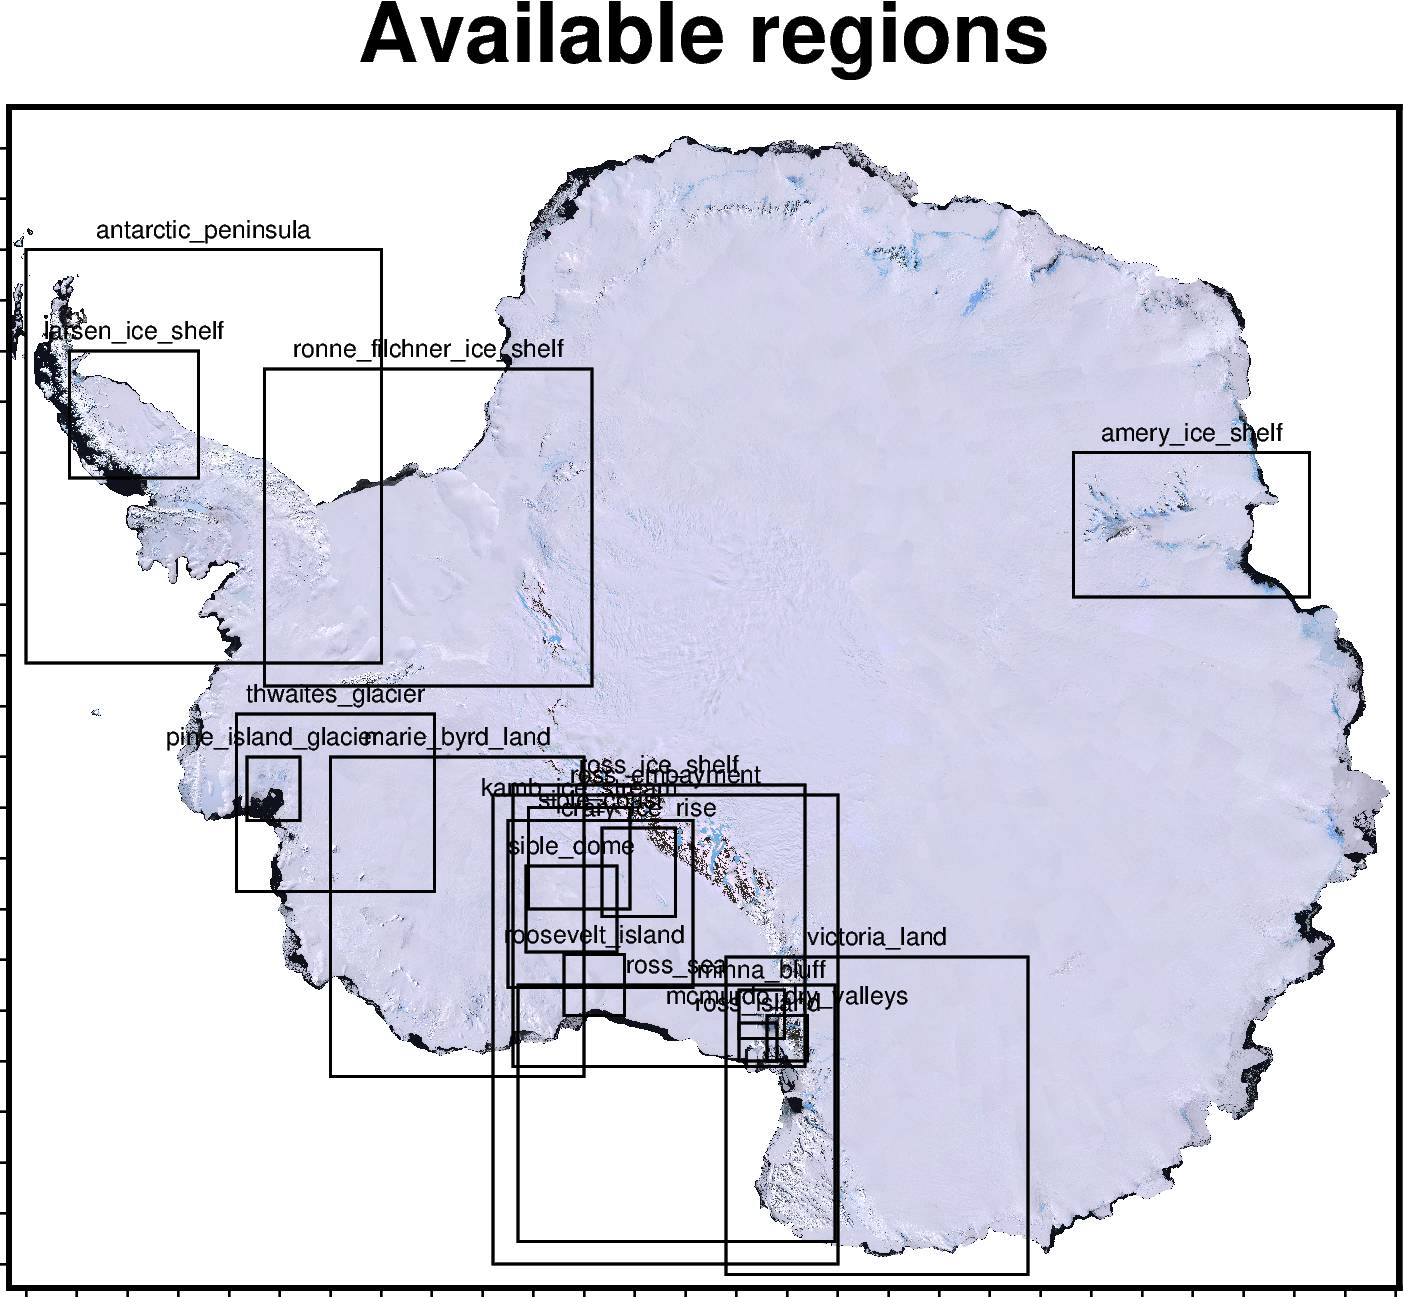

In [57]:
fig = maps.plot_grd(
    grid = fetch.imagery(),
    image = True,
    # grid = fetch.bedmachine(layer='surface', spacing=50e3),
    title = "Available regions",
)

for k, v in region_dict.items():
    fig.plot(
        x=[v[0], v[0], v[1], v[1], v[0]],
        y=[v[2], v[3], v[3], v[2], v[2]],
        pen=".6p,black",
        )
    fig.text(
        x=mean([v[1],v[0]]),
        y=v[3],
        text=k,
        justify='CB',
        offset='0/.1',
        no_clip=True,
        font="6p,Helvetica,black",
    )

fig.show()